In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import seaborn as sns
from ExplainableMaximumLikelihoodCalculator import ExplainableMaximumLikelihoodCalculator
import pysam
from Bio import SeqIO, Seq, SeqRecord, pairwise2
from Bio.pairwise2 import format_alignment
from LoadDataUtils import getListOfReadsFromBamFile, getListOfReadsFromFastaFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import shap
from scipy.stats import chisquare
from scipy.special import rel_entr
fileNameSapiens =  "data/simulatedData/human_chinese_AF346973_500samples.fas" #File that contains 500 reads from homo sapiens
fileNameNeanderthals =  "data/simulatedData/Neanderthal_Goyet_KX198085_500samples.fas" #File that contains 500 reads from neanderthal
fileNameDenisovans =  "data/simulatedData/denisova_kx663333_500samples.fas" #File that contains 500 reads from denisovan
neanderthals_500_generated = getListOfReadsFromFastaFile(fileNameNeanderthals)
sapiens_500_generated = getListOfReadsFromFastaFile(fileNameSapiens)
denisovan_500_samples = getListOfReadsFromFastaFile(fileNameDenisovans)
path_to_frequencies_table = "data/substitution_matrix.tsv"

2023-01-14 14:51:37.349412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 14:51:37.761993: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-14 14:51:37.788953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-14 14:51:37.788996: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
real_data = getListOfReadsFromFastaFile("data/RealData/fasta_of_merged_50_50.fas")

In [3]:
sapiens_reference_file_names = [
                    "data/reference_files/human_AF346981_French.fa",
                     "data/reference_files/human_AY195760_Korea.fa",
                      "data/reference_files/human_AY882416_Ethiopia.fa",
                      "data/reference_files/human_AY963586_Italian.fa",
                      "data/reference_files/human_AY195781_Caucasian.fa",
                      "data/reference_files/human_AY195757_Iraqi-Israeli.fa",
                      "data/reference_files/human_AY195749_NativeAmerican.fa"]
neanderthals_reference_file_names = [
                            "data/reference_files/neanderthal_mezmaiskaya1_FM865411.fa",
                           "data/reference_files/Neanderthal_Altai_KC879692.fa",
                           "data/reference_files/Neanderthal_Denisova11_full_mtDNA_KU131206.fa",
                           "data/reference_files/Neanderthal_Spy_94a_MG025538.fa",
                            "data/reference_files/Neanderthal_Vindija33.16_AM948965.fa",
                            "data/reference_files/Neanderthal_Vindija33.19_KJ533545.fa"]
denisovan_reference_file_names = [  
                        "data/reference_files/Denisova_MT576653.1.fa",
                        "data/reference_files/Denisova_MT576652.1.fa",
                        "data/reference_files/Denisova_4_FR695060.fa",
                        "data/reference_files/Denisova_8_KT780370.fa",
                        "data/reference_files/Denisova_manual_phalanx_NC_013993.fa",
                        "data/reference_files/Denisova_MT576651.1.fa"]

In [6]:
times = []
import time

In [7]:
sizes = [20,30,40,50,60,70,80,90,100]
for size in sizes:
    tic = time.perf_counter()
    dataset_1 = real_data[:size]
    maximum_likelihood_calculator_d_1 = ExplainableMaximumLikelihoodCalculator(dataset_1,
                                                ref_neanderthal_file_names=neanderthals_reference_file_names,
                                                ref_sapien_file_names=sapiens_reference_file_names,
                                                ref_denisovan_file_names=denisovan_reference_file_names,
                                                path_to_substitution_matrix=path_to_frequencies_table,
                                                number_of_jobs=-1)
    #shapleys = maximum_likelihood_calculator_d_1.calculate_shapley_values(5000)
    shapleys = maximum_likelihood_calculator_d_1.estimate_shapley_values(number_of_samples_per_read=10)[0] #[0] is to get the scaled values
    #cf = maximum_likelihood_calculator_d_1.generateCounterFactualMinimalSetToRemoveAndChangeMax(shapleys)
    toc = time.perf_counter()
    print(f"Took {toc - tic:0.4f} seconds")
    times.append(toc-tic)
    print(times)

Loading sequences and calculating alignments to all references, this might take a while. Number of reads:  20
First DNA sequence from input dataset: ACTTAGGAGATTTCAACTTAACTTGACCGCTCTGA
start working on read number 0
start working on read number 10
Start working on read number 0 in processId 10277
Start working on read number 1 in processId 10278
Start working on read number 2 in processId 10279
Start working on read number 3 in processId 10280
Start working on read number 4 in processId 10281Start working on read number 5 in processId 10282
Start working on read number 6 in processId 10283Start working on read number 7 in processId 10284


Start working on read number 8 in processId 10277
Start working on read number 9 in processId 10279
Start working on read number 10 in processId 10283
Start working on read number 11 in processId 10284Start working on read number 12 in processId 10280

Start working on read number 13 in processId 10278
Start working on read number 14 in processId 102

In [8]:
times

[75.5493298759975,
 96.09831318599754,
 113.98615239099308,
 130.407491793987,
 209.71403056599956,
 292.29744423599914,
 338.1626632230036,
 374.1355956079933,
 446.2489016380132]

In [9]:
sizes_d = [20,30,40,50,60,70,80,90,100]

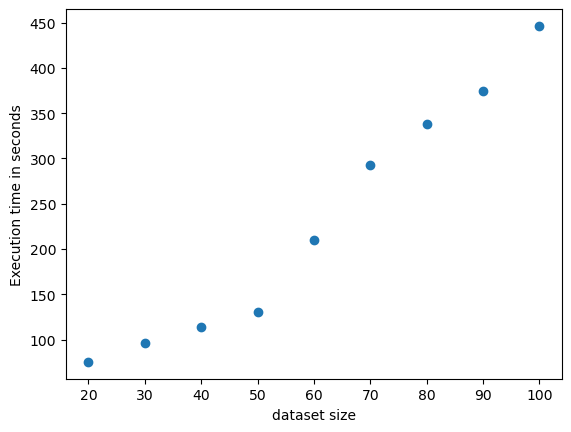

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = [1,2,4,6,8]
s = times[:5]

plt.scatter(sizes_d, times)
plt.xlabel("dataset size")
plt.ylabel("Execution time in seconds")
plt.savefig("realdataDataSetSizeToExecutionTimeAttributionBasedDataLevel.png")

plt.show()

In [12]:
times_threads = []
threads = [1,2,3,4,5,6,7,8]
for t_number in threads:
    tic = time.perf_counter()
    maximum_likelihood_calculator_d_1 = ExplainableMaximumLikelihoodCalculator(real_data[:50],
                                                ref_neanderthal_file_names=neanderthals_reference_file_names,
                                                ref_sapien_file_names=sapiens_reference_file_names,
                                                ref_denisovan_file_names=denisovan_reference_file_names,
                                                path_to_substitution_matrix=path_to_frequencies_table,
                                                number_of_jobs=t_number)
    #shapleys = maximum_likelihood_calculator_d_1.calculate_shapley_values(5000)
    shapleys = maximum_likelihood_calculator_d_1.estimate_shapley_values(number_of_samples_per_read=10, number_of_jobs=t_number)[0] #[0] is to get the scaled values
    #cf = maximum_likelihood_calculator_d_1.generateCounterFactualMinimalSetToRemoveAndChangeMax(shapleys)
    toc = time.perf_counter()
    print(f"Took {toc - tic:0.4f} seconds")
    times_threads.append(toc-tic)
    print(times_threads)

Loading sequences and calculating alignments to all references, this might take a while. Number of reads:  50
First DNA sequence from input dataset: ACTTAGGAGATTTCAACTTAACTTGACCGCTCTGA
start working on read number 0
start working on read number 10
start working on read number 20
start working on read number 30
start working on read number 40
Start working on read number 0 in processId 10242
Start working on read number 1 in processId 10242
Start working on read number 2 in processId 10242
Start working on read number 3 in processId 10242
Start working on read number 4 in processId 10242
Start working on read number 5 in processId 10242
Start working on read number 6 in processId 10242
Start working on read number 7 in processId 10242
Start working on read number 8 in processId 10242
Start working on read number 9 in processId 10242
Start working on read number 10 in processId 10242
Start working on read number 11 in processId 10242
Start working on read number 12 in processId 10242
Sta

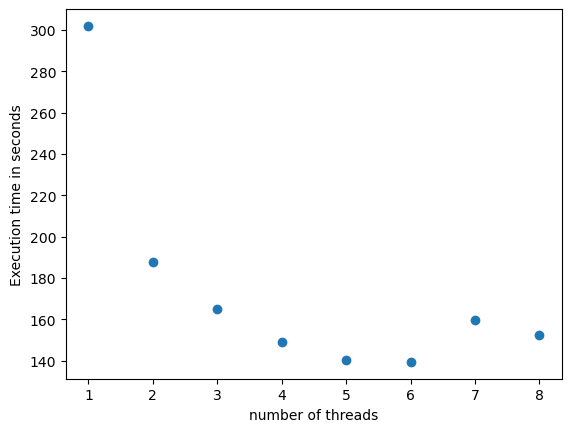

In [13]:
# Data for plotting


plt.scatter([1,2,3,4,5,6,7,8],times_threads)
plt.xlabel("number of threads")
plt.ylabel("Execution time in seconds")
plt.savefig("realdataThreadsToExecutionTimeAttributionBasedDataLevel.png")

plt.show()